# MNIST changing batch sizes

In [1]:
import torch
# 12 different batch sizes
# 4 different optms
# 20 different learning rates
# 3 replicates
# 3 values
# train loss, test loss, test accuracy
# 200 steps
import matplotlib.pyplot as plt

In [7]:
train_loss = torch.zeros(4,12,20)
test_loss = torch.zeros(4,12,20)
test_loss_std = torch.zeros(4,12,20)
test_acc = torch.zeros(4,12,20)

for i in range(48):
    opt_id = i // 12
    batch_id = i % 12
    results = torch.load(f"../outputs/scan-18-{i}.pt").nan_to_num(nan=100)
    train_loss[opt_id, batch_id] = results[:,:,0,-1].mean(dim=1)
    test_loss[opt_id, batch_id] = results[:,:,1,-1].mean(dim=1)
    test_loss_std[opt_id, batch_id] = results[:,:,1,-1].std(dim=1)
    test_acc[opt_id, batch_id] = results[:,:,2,-1].mean(dim=1)

In [9]:
btrain_loss = train_loss.min(dim=-1).values
btest_loss, btest_loss_idx = test_loss.min(dim=-1)
btest_loss_std = torch.gather(test_loss_std, -1, btest_loss_idx.unsqueeze(-1)).squeeze(-1)
btest_acc = test_acc.max(dim=-1).values
'''
xx = 6
btrain_loss = train_loss[:,:,xx]
btest_loss = test_loss[:,:,xx]
btest_acc = test_acc[:,:,xx]
'''

'\nxx = 6\nbtrain_loss = train_loss[:,:,xx]\nbtest_loss = test_loss[:,:,xx]\nbtest_acc = test_acc[:,:,xx]\n'

Text(0.5, 1.0, 'Train loss')

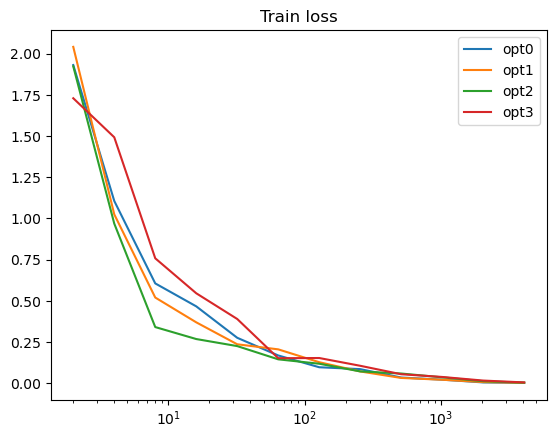

In [4]:
for i in range(4):
    plt.plot(2**torch.arange(1,13),btrain_loss[i], label=f"opt{i}")
plt.xscale("log")
plt.legend()
plt.title("Train loss")

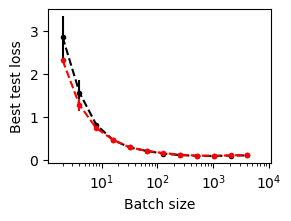

In [15]:
plt.figure(figsize=(2.8, 2.1),constrained_layout=True)
#for i in range(2):
# 0 is Adam, 1 is Signum
#plt.plot(2**torch.arange(1,13),btest_loss[0],color = 'black')
#plt.plot(2**torch.arange(1,13),btest_loss[1],color='red')
plt.errorbar(2**torch.arange(1,13),btest_loss[0],yerr=btest_loss_std[0],color = 'black',ls='--',marker='o',markersize=3)
plt.errorbar(2**torch.arange(1,13),btest_loss[1],yerr=btest_loss_std[1],color='red',ls='--',marker='o',markersize=3)
plt.xscale("log")
#plt.yscale("log")
plt.xlim(1.1,2**13.4)
plt.xlabel("Batch size")
plt.ylabel("Best test loss")
plt.savefig("../figures/scan-18-test-loss.pdf")

σ_C = √[(B²/A⁴)σ²_A + (1/A²)σ²_B]

In [16]:
errorI = ((btest_loss[1]**2 / btest_loss[0]**4)*btest_loss_std[0]**2 + (1/btest_loss[0]**2)*btest_loss_std[1]**2)**0.5

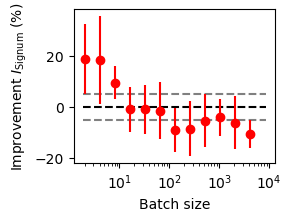

In [20]:
plt.figure(figsize=(2.8, 2.1),constrained_layout=True)
plt.plot(2**torch.linspace(.9,13.1,12), torch.zeros(12), '--k')
plt.plot(2**torch.linspace(.9,13.1,12), torch.ones(12)*5, '--', c = '0.5')
plt.plot(2**torch.linspace(.9,13.1,12), -torch.ones(12)*5, '--', c = '0.5')
#plt.scatter(2**torch.arange(1,13), (-btest_loss[1] + btest_loss[0]) / btest_loss[0] * 100, c='C1')
plt.errorbar(2**torch.arange(1,13), (-btest_loss[1] + btest_loss[0]) / btest_loss[0] * 100, yerr = errorI * 100, fmt='o', c='red')
plt.xscale("log")
plt.xlabel("Batch size")
plt.ylabel(r"Improvement $I_{\rm Signum}$ (%)")
plt.savefig("../figures/scan-18-improve.pdf")

Text(0.5, 1.0, 'Test accuracy')

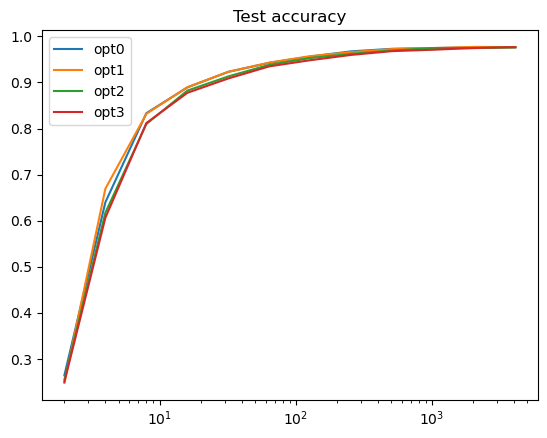

In [13]:
for i in range(4):
    plt.plot(2**torch.arange(1,13),btest_acc[i], label=f"opt{i}")
plt.xscale("log")
plt.legend()
plt.title("Test accuracy")